In [33]:
# Initial imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np

In [129]:
# Load the crypto_data.csv dataset.
file_path = "cryptocoin.csv"
crypto_data_df = pd.read_csv(file_path, index_col=0)
crypto_data_df

,index,id,symbol,name,image,index.1,symbol.1,current_price,market_cap,market_cap_rank,...,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,price_change_percentage_1y_in_currency,price_change_percentage_200d_in_currency,price_change_percentage_30d_in_currency
0,0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,0,btc,33659.000000,631376228513,1,...,64805.000000,-48.02758,2021-04-14T11:54:46.763Z,67.810000,49569.78431,2013-07-06T00:00:00.000Z,2021-07-02T01:24:35.167Z,264.645494,75.755819,-8.235631
1,1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1,eth,2124.890000,247647170514,2,...,4356.990000,-51.18638,2021-05-12T14:41:48.623Z,0.432979,491102.96561,2015-10-20T00:00:00.000Z,2021-07-02T01:24:31.648Z,821.213530,259.952746,-19.287269
2,2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,2,usdt,1.000000,62722847723,3,...,1.320000,-24.21792,2018-07-24T00:00:00.000Z,0.572521,75.13229,2015-03-02T00:00:00.000Z,2021-07-02T01:05:25.435Z,0.232499,0.351418,0.033122
3,3,binancecoin,bnb,Binance Coin,https://assets.coingecko.com/coins/images/825/...,3,bnb,289.150000,44686999253,4,...,686.310000,-57.85200,2021-05-10T07:24:17.097Z,0.039818,726372.15648,2017-10-19T00:00:00.000Z,2021-07-02T01:24:37.223Z,1727.717347,895.324720,-20.051472
4,4,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,4,ada,1.340000,43030432831,5,...,2.450000,-44.91898,2021-05-16T07:44:28.033Z,0.019253,6896.37798,2020-03-13T02:22:55.044Z,2021-07-02T01:24:21.183Z,1296.275304,772.142670,-22.811222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,245,ampleforth-governance-token,forth,Ampleforth Governance Token,https://assets.coingecko.com/coins/images/1491...,245,forth,14.210000,121906951,245,...,180.470000,-92.12615,2021-04-21T16:13:43.320Z,9.690000,46.70106,2021-06-26T08:25:01.088Z,2021-07-02T01:24:43.106Z,NaN,NaN,-35.479551
250,246,storj,storj,Storj,https://assets.coingecko.com/coins/images/949/...,246,storj,0.841189,120363675,248,...,3.810000,-78.00823,2021-03-28T01:39:34.946Z,0.050240,1566.19825,2020-03-13T02:29:53.872Z,2021-07-02T01:24:43.449Z,448.390044,140.946327,-20.212153
251,247,hive,hive,Hive,https://assets.coingecko.com/coins/images/1084...,247,hive,0.322569,119985664,247,...,1.040000,-69.06325,2021-03-28T01:54:29.066Z,0.087309,269.45694,2020-04-06T07:35:48.099Z,2021-07-02T01:21:26.250Z,50.690232,168.428416,-24.324767
252,248,electroneum,etn,Electroneum,https://assets.coingecko.com/coins/images/1109...,248,etn,0.006590,117836519,249,...,0.207854,-96.84158,2018-01-06T00:00:00.000Z,0.001348,387.07386,2020-03-13T02:24:21.810Z,2021-07-02T01:23:53.243Z,6.162270,36.068410,-29.189814


In [3]:
crypto_data_df.dropna()

,index,id,symbol,name,image,index.1,symbol.1,current_price,market_cap,market_cap_rank,...,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,price_change_percentage_1y_in_currency,price_change_percentage_200d_in_currency,price_change_percentage_30d_in_currency
0,0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,0,btc,33659.000000,631376228513,1,...,64805.000000,-48.02758,2021-04-14T11:54:46.763Z,67.810000,4.956978e+04,2013-07-06T00:00:00.000Z,2021-07-02T01:24:35.167Z,264.645494,75.755819,-8.235631
3,3,binancecoin,bnb,Binance Coin,https://assets.coingecko.com/coins/images/825/...,3,bnb,289.150000,44686999253,4,...,686.310000,-57.85200,2021-05-10T07:24:17.097Z,0.039818,7.263722e+05,2017-10-19T00:00:00.000Z,2021-07-02T01:24:37.223Z,1727.717347,895.324720,-20.051472
4,4,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,4,ada,1.340000,43030432831,5,...,2.450000,-44.91898,2021-05-16T07:44:28.033Z,0.019253,6.896378e+03,2020-03-13T02:22:55.044Z,2021-07-02T01:24:21.183Z,1296.275304,772.142670,-22.811222
6,6,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,6,xrp,0.663160,30716677286,7,...,3.400000,-80.49515,2018-01-07T00:00:00.000Z,0.002686,2.457654e+04,2014-05-22T00:00:00.000Z,2021-07-02T01:24:33.233Z,275.217918,29.848962,-34.427281
10,10,bitcoin-cash,bch,Bitcoin Cash,https://assets.coingecko.com/coins/images/780/...,10,bch,501.400000,9411748588,11,...,3785.820000,-86.75314,2017-12-20T00:00:00.000Z,76.930000,5.518539e+02,2018-12-16T00:00:00.000Z,2021-07-02T01:24:36.229Z,124.108699,82.226320,-27.306577
13,13,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,13,sol,33.760000,9209194456,14,...,58.030000,-41.76856,2021-05-18T16:59:08.690Z,0.500801,6.647972e+03,2020-05-11T19:35:23.449Z,2021-07-02T01:24:19.246Z,3955.144094,2054.860476,8.946787
14,14,chainlink,link,Chainlink,https://assets.coingecko.com/coins/images/877/...,14,link,18.400000,8014072506,15,...,52.700000,-65.04431,2021-05-10T00:13:57.214Z,0.148183,1.233087e+04,2017-11-29T00:00:00.000Z,2021-07-02T01:24:22.344Z,291.466999,42.302068,-40.155034
16,16,matic-network,matic,Polygon,https://assets.coingecko.com/coins/images/4713...,16,matic,1.080000,6841072362,17,...,2.620000,-58.56902,2021-05-18T19:38:18.813Z,0.003144,3.443406e+04,2019-05-10T00:00:00.000Z,2021-07-02T01:24:20.699Z,5699.047661,5874.663782,-40.575476
17,17,wrapped-bitcoin,wbtc,Wrapped Bitcoin,https://assets.coingecko.com/coins/images/7598...,17,wbtc,33741.000000,6605785795,18,...,64565.000000,-47.72681,2021-04-14T12:00:05.340Z,3139.170000,9.751336e+02,2019-04-02T00:00:00.000Z,2021-07-02T01:24:00.209Z,265.662795,76.032157,-8.134307
20,20,stellar,xlm,Stellar,https://assets.coingecko.com/coins/images/100/...,20,xlm,0.271973,6318400065,21,...,0.875563,-68.90134,2018-01-03T00:00:00.000Z,0.000476,5.708861e+04,2015-03-05T00:00:00.000Z,2021-07-02T01:24:34.268Z,297.383609,55.685148,-35.896120


In [4]:
# Drop the non-beneficial ID columns.
crypto_data_df.drop(['image', 'index.1', 'symbol.1'], axis=1, inplace=True)

In [5]:
crypto_data_df.drop(['market_cap_rank', 'high_24h', 'low_24h'], axis=1, inplace=True)

In [6]:
crypto_data_df.drop(['price_change_24h', 'price_change_percentage_24h', 'market_cap_change_24h'], axis=1, inplace=True)

In [7]:
crypto_data_df.drop(['market_cap_change_percentage_24h', 'ath_date', 'atl_date'], axis=1, inplace=True)

In [8]:
crypto_data_df.drop(['price_change_percentage_30d_in_currency'], axis=1, inplace=True)

In [9]:
crypto_data_df.drop(['index', 'id', 'symbol', 'name'], axis=1, inplace=True)

In [47]:
crypto_data_df.dropna()


,index,current_price,market_cap,fully_diluted_valuation,total_volume,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage,last_updated,price_change_percentage_1y_in_currency,price_change_percentage_200d_in_currency
0,0,33659.000000,631376228513,7.072923e+11,2.918679e+10,1.874600e+07,2.100000e+07,2.100000e+07,Other,-48.02758,67.810000,4.956978e+04,2021-07-02T01:24:35.167Z,264.645494,75.755819
3,3,289.150000,44686999253,4.931377e+10,1.208957e+09,1.545337e+08,1.705337e+08,1.705337e+08,Other,-57.85200,0.039818,7.263722e+05,2021-07-02T01:24:37.223Z,1727.717347,895.324720
4,4,1.340000,43030432831,6.038626e+10,3.075731e+09,3.206639e+10,4.500000e+10,4.500000e+10,2.45,-44.91898,0.019253,6.896378e+03,2021-07-02T01:24:21.183Z,1296.275304,772.142670
6,6,0.663160,30716677286,6.656278e+10,2.615409e+09,4.614693e+10,1.000000e+11,1.000000e+11,Other,-80.49515,0.002686,2.457654e+04,2021-07-02T01:24:33.233Z,275.217918,29.848962
10,10,501.400000,9411748588,1.052502e+10,3.893162e+09,1.877875e+07,2.100000e+07,2.100000e+07,Other,-86.75314,76.930000,5.518539e+02,2021-07-02T01:24:36.229Z,124.108699,82.226320
13,13,33.760000,9209194456,1.650507e+10,6.617982e+08,2.726371e+08,4.886306e+08,4.886306e+08,Other,-41.76856,0.500801,6.647972e+03,2021-07-02T01:24:19.246Z,3955.144094,2054.860476
14,14,18.400000,8014072506,1.840160e+10,8.372940e+08,4.355096e+08,1.000000e+09,1.000000e+09,Other,-65.04431,0.148183,1.233087e+04,2021-07-02T01:24:22.344Z,291.466999,42.302068
16,16,1.080000,6841072362,1.085295e+10,6.373598e+08,6.303422e+09,1.000000e+10,1.000000e+10,Other,-58.56902,0.003144,3.443406e+04,2021-07-02T01:24:20.699Z,5699.047661,5874.663782
17,17,33741.000000,6605785795,6.605786e+09,3.107232e+08,1.957756e+05,1.957756e+05,1.957756e+05,Other,-47.72681,3139.170000,9.751336e+02,2021-07-02T01:24:00.209Z,265.662795,76.032157
20,20,0.271973,6318400065,1.360189e+10,3.702277e+08,2.322702e+10,5.000180e+10,5.000180e+10,Other,-68.90134,0.000476,5.708861e+04,2021-07-02T01:24:34.268Z,297.383609,55.685148


In [11]:
crypto_data_df.dtypes

current_price                               float64
market_cap                                    int64
fully_diluted_valuation                     float64
total_volume                                float64
circulating_supply                          float64
total_supply                                float64
max_supply                                  float64
ath                                         float64
ath_change_percentage                       float64
atl                                         float64
atl_change_percentage                       float64
last_updated                                 object
price_change_percentage_1y_in_currency      float64
price_change_percentage_200d_in_currency    float64
dtype: object

In [50]:
# Generate our categorical variable list
crypto_cat = crypto_data_df.dropna().dtypes[crypto_data_df.dtypes == "float"].index.tolist()

# Check the number of unique values in each column
crypto_data_df.dropna()[crypto_cat].nunique()

current_price                               59
fully_diluted_valuation                     60
total_volume                                60
circulating_supply                          60
total_supply                                43
max_supply                                  41
ath_change_percentage                       60
atl                                         60
atl_change_percentage                       60
price_change_percentage_1y_in_currency      60
price_change_percentage_200d_in_currency    60
dtype: int64

In [51]:
apps_type_counts = crypto_data_df.dropna().ath.value_counts()
apps_type_counts

Other    55
2.45      2
4.07      2
1.22      1
Name: ath, dtype: int64

<AxesSubplot:ylabel='Density'>

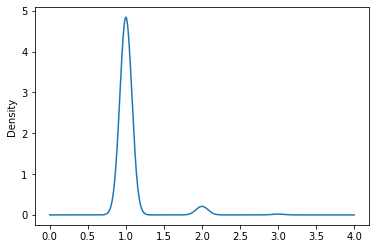

In [14]:
apps_type_counts.plot.density()

In [52]:
# Determine which values to replace if counts are less than ...?
replace_ath = list(apps_type_counts[apps_type_counts < 2].index)

# Replace in dataframe
for app in replace_ath:
    crypto_data_df.dropna().ath = crypto_data_df.dropna().ath.replace(app,"Other")
    
# Check to make sure binning was successful
crypto_data_df.dropna().ath.value_counts()

/Users/camewan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Other    55
2.45      2
4.07      2
1.22      1
Name: ath, dtype: int64

In [109]:
# Generate our categorical variable lists
application_cat = ['current_price','circulating_supply', 'fully_diluted_valuation', 'total_volume', 'total_supply', 'market_cap']

In [110]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE


# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(crypto_data_df.dropna()[application_cat]))
encode_df.head()

,0,1,2,3,4,5,6,7,8,9,...,332,333,334,335,336,337,338,339,340,341
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [111]:
hot_df = crypto_data_df.dropna().merge(encode_df,left_index=True,right_index=True).drop(application_cat, 1)

In [112]:
hot_df.drop(columns=['ath', 'last_updated'])

,index,max_supply,ath_change_percentage,atl,atl_change_percentage,price_change_percentage_1y_in_currency,price_change_percentage_200d_in_currency,0,1,2,...,332,333,334,335,336,337,338,339,340,341
0,0,2.100000e+07,-48.02758,67.810000,49569.78431,264.645494,75.755819,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,1.705337e+08,-57.85200,0.039818,726372.15648,1727.717347,895.324720,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,4.500000e+10,-44.91898,0.019253,6896.37798,1296.275304,772.142670,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,6,1.000000e+11,-80.49515,0.002686,24576.53547,275.217918,29.848962,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,10,2.100000e+07,-86.75314,76.930000,551.85386,124.108699,82.226320,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,13,4.886306e+08,-41.76856,0.500801,6647.97153,3955.144094,2054.860476,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,14,1.000000e+09,-65.04431,0.148183,12330.86915,291.466999,42.302068,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,16,1.000000e+10,-58.56902,0.003144,34434.06310,5699.047661,5874.663782,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,17,1.957756e+05,-47.72681,3139.170000,975.13362,265.662795,76.032157,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,20,5.000180e+10,-68.90134,0.000476,57088.61008,297.383609,55.685148,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,current_price_0.02293671,current_price_0.02368425,current_price_0.074694,current_price_0.118976,current_price_0.161516,current_price_0.212636,current_price_0.225533,current_price_0.241044,current_price_0.251434,current_price_0.271973,...,market_cap_6318400065,market_cap_6605785795,market_cap_6841072362,market_cap_8014072506,market_cap_9209194456,market_cap_9411748588,market_cap_30716677286,market_cap_43030432831,market_cap_44686999253,market_cap_631376228513
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [114]:
# Split our preprocessed data into our features and target arrays
y = hot_df.drop(columns=['ath', 'last_updated'])['price_change_percentage_1y_in_currency']
X = hot_df.drop(columns=['ath', 'last_updated']).drop('price_change_percentage_1y_in_currency', axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [115]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [116]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [117]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [118]:
# Create a callback that saves the model's weights every 5 epochs
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

In [119]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 385ms/step - loss: 23.6952 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: -32.1657 - accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: -86.7172 - accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: -139.4168 - accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: -189.6561 - accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: -236.8327 - accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: -280.4848 - accuracy: 0.0000e+00
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: -320.4338 - accuracy: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: -356.8339 - accuracy: 0.0000e+00
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: -390

In [120]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: -3.2070e+03 - accuracy: 0.0000e+00
Loss: -3207.042724609375, Accuracy: 0.0
